# Required Imports

In [3]:
import requests
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from statsmodels.stats.proportion import proportions_ztest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# API Key and API URL
* API key is inserted and puuid is aquired through a request.

In [79]:
api_key = ''

In [8]:
accountv1_api_url = 'https://europe.api.riotgames.com/riot/account/v1/accounts/by-riot-id/Yuvi/TR1?api_key=' + api_key

In [10]:
puuid = requests.get(accountv1_api_url).json()['puuid']

# Match IDs and Data Gathering
* Puuid is used to get the match IDs through Riot Developer Portal.
* Match details are gathered using MatchV5 API URL and API key.
* 1.2 seconds of delay induced since my API key has a limitation of 100 requests per 2 minutes.
* The data obtained through API is stored in a dictionary to avoid unnecesary waiting time and API requests.

In [13]:
match_ids = [    "TR1_1507067592",
    "TR1_1507027090",
    "TR1_1506915327",
    "TR1_1506902041",
    "TR1_1506889558",
    "TR1_1506878269",
    "TR1_1506356175",
    "TR1_1506347181",
    "TR1_1506226132",
    "TR1_1506214133",
    "TR1_1506196584",
    "TR1_1506182946",
    "TR1_1506134907",
    "TR1_1506128294",
    "TR1_1506118867",
    "TR1_1506115400",
    "TR1_1498359080",
    "TR1_1498342569",
    "TR1_1498198857",
    "TR1_1498189018",
    "TR1_1498168524",
    "TR1_1498151611",
    "TR1_1498135843",
    "TR1_1485880915",
    "TR1_1481359631",
    "TR1_1481347612",
    "TR1_1444845722",
    "TR1_1444834165",
    "TR1_1434347904",
    "TR1_1434330027",
    "TR1_1432616433",
    "TR1_1428524919",
    "TR1_1428522832",
    "TR1_1428493956",
    "TR1_1428476679",
    "TR1_1513935950",
    "TR1_1513929876",
    "TR1_1513924757",
    "TR1_1513777976",
    "TR1_1513763401",
    "TR1_1513753034",
    "TR1_1513505744",
    "TR1_1513495258",
    "TR1_1513476662",
    "TR1_1513466626",
    "TR1_1513446684",
    "TR1_1513436928",
    "TR1_1513433788",
    "TR1_1513272090",
    "TR1_1513256506",
    "TR1_1513159086",
    "TR1_1513151708",
    "TR1_1513144197",
    "TR1_1513133914",
    "TR1_1513128727",
    "TR1_1513080090",
    "TR1_1513063326",
    "TR1_1513053480",
    "TR1_1513035997",
    "TR1_1512815112",
    "TR1_1512790768",
    "TR1_1512778839",
    "TR1_1512773419",
    "TR1_1512316659",
    "TR1_1512303920",
    "TR1_1512278613",
    "TR1_1512269815",
    "TR1_1512213414",
    "TR1_1512209604",
    "TR1_1512204813",
    "TR1_1512093058",
    "TR1_1512079376",
    "TR1_1512066557",
    "TR1_1512049895",
    "TR1_1512039287",
    "TR1_1512025860",
    "TR1_1512018883",
    "TR1_1511977142",
    "TR1_1511946004",
    "TR1_1511941065",
    "TR1_1511876323",
    "TR1_1511860576",
    "TR1_1511839479",
    "TR1_1511818880",
    "TR1_1511796978",
    "TR1_1511789430",
    "TR1_1511766939",
    "TR1_1511739982",
    "TR1_1511732018",
    "TR1_1511717011",
    "TR1_1511701967",
    "TR1_1511695391",
    "TR1_1511685078",
    "TR1_1511670936",
    "TR1_1511662958",
    "TR1_1511657531",
    "TR1_1511609508",
    "TR1_1511600230",
    "TR1_1511586308",
    "TR1_1511571754",
    "TR1_1511433718",
    "TR1_1511429835",
    "TR1_1511431028",
    "TR1_1511179775",
    "TR1_1511170513",
    "TR1_1511163240",
    "TR1_1511154448",
    "TR1_1511140772",
    "TR1_1510969423",
    "TR1_1510965845",
    "TR1_1510909143",
    "TR1_1510894849",
    "TR1_1510891365",
    "TR1_1510850382",
    "TR1_1510845599",
    "TR1_1510753777",
    "TR1_1510726152",
    "TR1_1507742119",
    "TR1_1507729624",
    "TR1_1507725222",
    "TR1_1507646851",
    "TR1_1507443504",
    "TR1_1507437245",
    "TR1_1507319975",
    "TR1_1507309953",
    "TR1_1563811474",
    "TR1_1563803570",
    "TR1_1563801272",
    "TR1_1563681582",
    "TR1_1563669720",
    "TR1_1563634431",
    "TR1_1563624552",
    "TR1_1563579777",
    "TR1_1563576921",
    "TR1_1563369851",
    "TR1_1562377062",
    "TR1_1562367823",
    "TR1_1562362308",
    "TR1_1561001530",
    "TR1_1560996103",
    "TR1_1559647102",
    "TR1_1559587515",
    "TR1_1557823291",
    "TR1_1557174339",
    "TR1_1557040867",
    "TR1_1557033645",
    "TR1_1556975947",
    "TR1_1556972395",
    "TR1_1556898869",
    "TR1_1556892687",
    "TR1_1556889763",
    "TR1_1556876363",
    "TR1_1555543950",
    "TR1_1555542940",
    "TR1_1555538093",
    "TR1_1554929987",
    "TR1_1554917307",
    "TR1_1554898717",
    "TR1_1554360868",
    "TR1_1554110974",
    "TR1_1554097583",
    "TR1_1553877137",
    "TR1_1553855543",
    "TR1_1553574758",
    "TR1_1553556581",
    "TR1_1553538398",
    "TR1_1553523996",
    "TR1_1553514339",
    "TR1_1553499640",
    "TR1_1553491602",
    "TR1_1553478826",
    "TR1_1553474095",
    "TR1_1553466393",
    "TR1_1553378733",
    "TR1_1552980143",
    "TR1_1552964245",
    "TR1_1552914674",
    "TR1_1552903586",
    "TR1_1552856515",
    "TR1_1552748321",
    "TR1_1552744872",
    "TR1_1552435911",
    "TR1_1552324802",
    "TR1_1524688524",
    "TR1_1524309552",
    "TR1_1518684165",
    "TR1_1518406699",
    "TR1_1518259107",
    "TR1_1517691085",
    "TR1_1517280353",
    "TR1_1517272242",
    "TR1_1517034215",
    "TR1_1517028590",
    "TR1_1517021587",
    "TR1_1516821421",
    "TR1_1516806920",
    "TR1_1516792982",
    "TR1_1515754313",
    "TR1_1515726126",
    "TR1_1515697092",
    "TR1_1515688252",
    "TR1_1515680512",
    "TR1_1515670567",
    "TR1_1515664529",
    "TR1_1515551925",
    "TR1_1515541262",
    "TR1_1515525634",
    "TR1_1515492108",
    "TR1_1570595535",
    "TR1_1570347853",
    "TR1_1570338041",
    "TR1_1570310640",
    "TR1_1570301891",
    "TR1_1570293456",
    "TR1_1570287651",
    "TR1_1570277904",
    "TR1_1570270782",
    "TR1_1570267347",
    "TR1_1570222326",
    "TR1_1570214214",
    "TR1_1570204323",
    "TR1_1570071036",
    "TR1_1569880003",
    "TR1_1569865146",
    "TR1_1569843470",
    "TR1_1569495771",
    "TR1_1569483285",
    "TR1_1569478407",
    "TR1_1569087832",
    "TR1_1569065561",
    "TR1_1569054784",
    "TR1_1568842837",
    "TR1_1568835095",
    "TR1_1568693116",
    "TR1_1568640334",
    "TR1_1568622220",
    "TR1_1568546368",
    "TR1_1568530983",
    "TR1_1568468063",
    "TR1_1568458825",
    "TR1_1568409319",
    "TR1_1568395657",
    "TR1_1568366708",
    "TR1_1568346163",
    "TR1_1568331035",
    "TR1_1568279706",
    "TR1_1568274069",
    "TR1_1568239061",
    "TR1_1568227440",
    "TR1_1568186791",
    "TR1_1568180711",
    "TR1_1568169065",
    "TR1_1567840176",
    "TR1_1566914180",
    "TR1_1566754911",
    "TR1_1566653373",
    "TR1_1566648024",
    "TR1_1566642019",
    "TR1_1566634414",
    "TR1_1566628380",
    "TR1_1566313285",
    "TR1_1566303269",
    "TR1_1565505876",
    "TR1_1565448285",
    "TR1_1565439438",
    "TR1_1565430123",
    "TR1_1565407667",
    "TR1_1565404036",
    "TR1_1565262896",
    "TR1_1565250206",
    "TR1_1565002044",
    "TR1_1564995822",
    "TR1_1564848086",
    "TR1_1564840842",
    "TR1_1564492115",
    "TR1_1564480619",
    "TR1_1564458644",
    "TR1_1563983891",
]

In [15]:
def get_match_details(match_id,api_key):
    match_details_resp = requests.get("https://europe.api.riotgames.com/lol/match/v5/matches/" + match_id + "?api_key=" + api_key)
    match_details = match_details_resp.json()
    time.sleep(1.2)
    return match_details

In [17]:
data =  {
    'kills': [],
    'deaths': [],
    'assists': [],
    'killingspree': [],
    'gamelenght': [],
    'champion': [],
    'firstblood': [],
    'gold':  [],
    'lane': [],
    'largestmultikill': [],
    'championdamage': [],
    'minionskilled': [],
    'visionscore': [],
    'win': [],
    'level': [],
    'buildingdamage': [],
    'starttime': []
}

In [19]:
for matchid in match_ids:
    game_data = get_match_details(matchid,api_key)
    player_index = game_data['metadata']['participants'].index(puuid)
    data['kills'].append(game_data['info']['participants'][player_index]['kills'])
    data['deaths'].append(game_data['info']['participants'][player_index]['deaths'])
    data['assists'].append(game_data['info']['participants'][player_index]['assists'])
    data['killingspree'].append(game_data['info']['participants'][player_index]['largestKillingSpree'])
    data['gamelenght'].append(game_data['info']['gameDuration'])
    data['champion'].append(game_data['info']['participants'][player_index]['championName'])
    data['firstblood'].append(game_data['info']['participants'][player_index]['firstBloodKill'])
    data['gold'].append(game_data['info']['participants'][player_index]['goldEarned'])
    data['lane'].append(game_data['info']['participants'][player_index]['lane'])
    data['largestmultikill'].append(game_data['info']['participants'][player_index]['largestMultiKill'])
    data['championdamage'].append(game_data['info']['participants'][player_index]['totalDamageDealtToChampions'])
    data['minionskilled'].append(game_data['info']['participants'][player_index]['totalMinionsKilled'])
    data['visionscore'].append(game_data['info']['participants'][player_index]['visionScore'])
    data['win'].append(game_data['info']['participants'][player_index]['win'])
    data['level'].append(game_data['info']['participants'][player_index]['champLevel'])
    data['buildingdamage'].append(game_data['info']['participants'][player_index]['damageDealtToBuildings'])
    data['starttime'].append(game_data['info']['gameStartTimestamp'])
    

# Exploring and Preprocessing the Data
* Converted start time of the games into seconds. Used datetime to convert Unix Timestamp to seconds.
* Replaced True and False values with 1s and 0s.
* Created a new data frame containing only games that lasted more than 5 minutes since i noticed that there were remakes (ending games due to AFK players) in my data.

In [21]:
index = 0
for unixtimestamp in data['starttime']:
    data['starttime'][index] = datetime.fromtimestamp(unixtimestamp / 1000).strftime('%B')
    index = index + 1
    
df = pd.DataFrame(data)
pd.set_option('future.no_silent_downcasting', True)
df = df.replace({True: 1, False: 0})

df = df[df['gamelenght'] > 300]

# Monthly Game Count
* It can be observed that my playtime spiked in certain months and were relatively low in others.


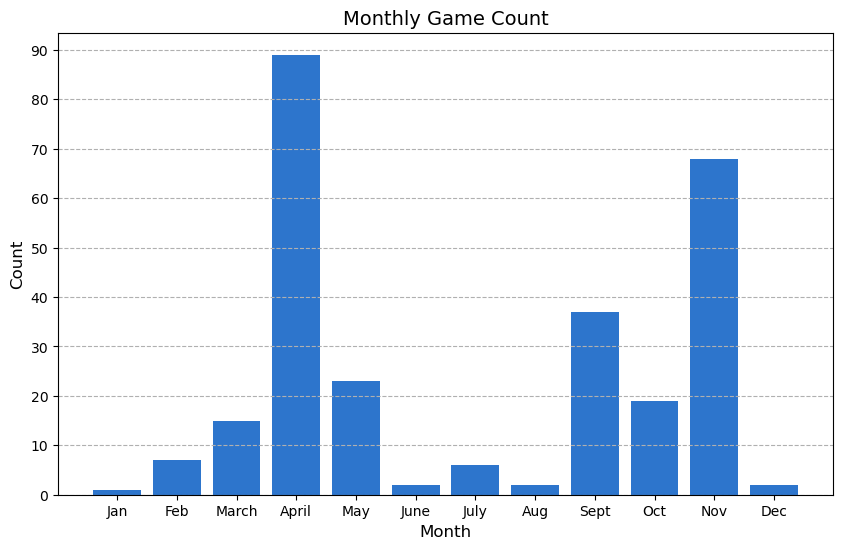

In [23]:
month_counts = df['starttime'].value_counts()

month_counts_monthorder = {
    'Jan': month_counts['January'],
    'Feb': month_counts['February'],
    'March': month_counts['March'],
    'April': month_counts['April'],
    'May': month_counts['May'],
    'June': month_counts['June'],
    'July': month_counts['July'],
    'Aug': month_counts['August'],
    'Sept': month_counts['September'],
    'Oct': month_counts['October'],
    'Nov': month_counts['November'],
    'Dec': month_counts['December']
}
df_months = pd.DataFrame(list(month_counts_monthorder.items()), columns=['Month', 'Count'])

plt.figure(figsize=(10, 6))
plt.bar(df_months['Month'], df_months['Count'], color='#2d75cc')
plt.title('Monthly Game Count', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks([0,10,20,30,40,50,60,70,80,90])
plt.grid(axis='y', linestyle='--')
plt.show()

# Most Played Champions and Their Game Counts.
* Included only champions that i played at least 5 times to ensure that plot was readable.


In [25]:
df.reset_index(drop=True, inplace=True)
champion_counts = df['champion'].value_counts()
champions5plus = champion_counts[champion_counts >= 5]
lenmostplayedchamps = len(champions5plus)
df_5plus = df[
    (df['champion'] == 'Ahri') |
    (df['champion'] == 'Vladimir') |
    (df['champion'] == 'Gragas') |
    (df['champion'] == 'Yone') |
    (df['champion'] == 'Riven') |
    (df['champion'] == 'Vex') |
    (df['champion'] == 'Swain') |
    (df['champion'] == 'Viktor') |
    (df['champion'] == 'Ezreal') |
    (df['champion'] == 'Kassadin') |
    (df['champion'] == 'Khazix')
]

df_5plus.reset_index(drop=True, inplace=True)

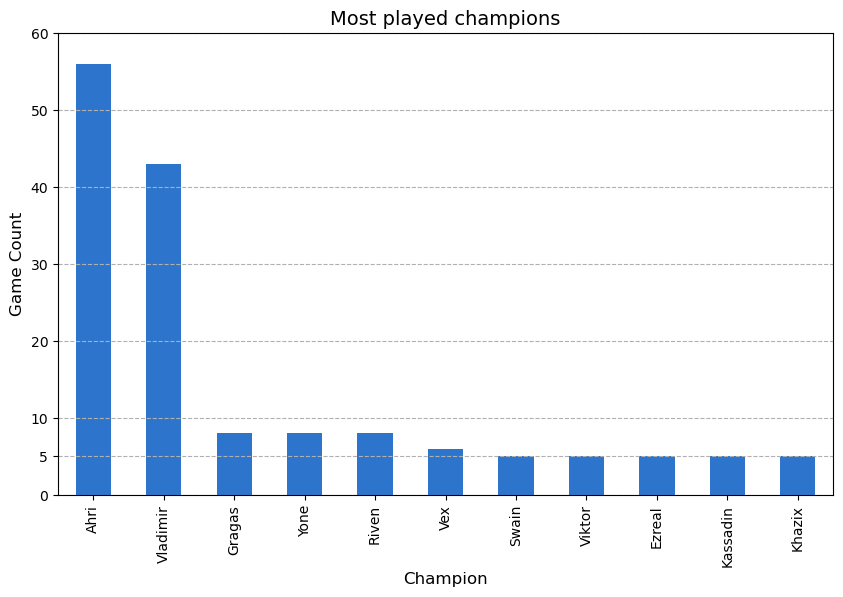

In [26]:
plt.figure(figsize=(10, 6))
champions5plus.plot(kind='bar', color='#2d75cc')
plt.title('Most played champions', fontsize=14)
plt.xlabel('Champion', fontsize=12)
plt.ylabel('Game Count', fontsize=12)
plt.yticks([0,5,10,20,30,40,50,60])
plt.grid(axis='y', linestyle='--')
plt.show()


# Most Played Champions and Their Winrates.
* When previous and current plot are observed, the most notible outcome is that I should focus on playing more Ahri since my winrate is almost 70 percent with a high game count.


In [28]:
winrates = df_5plus.groupby('champion')['win'].mean().sort_values(ascending = False) * 100
pd.options.display.float_format = '{:.2f}'.format

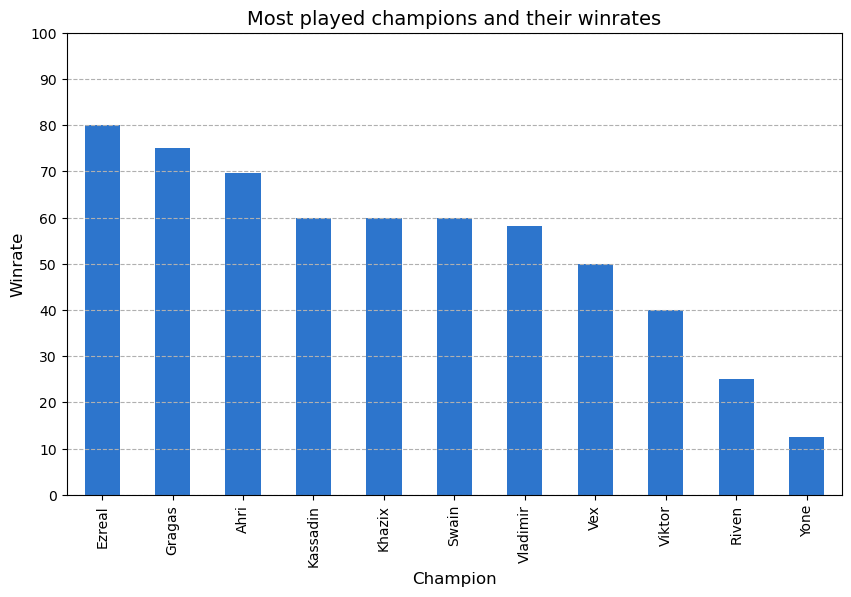

In [29]:
plt.figure(figsize=(10, 6))
winrates.plot(kind='bar', color='#2d75cc')
plt.title('Most played champions and their winrates', fontsize=14)
plt.xlabel('Champion', fontsize=12)
plt.ylabel('Winrate', fontsize=12)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.grid(axis='y', linestyle='--')
plt.show()

# Gold Income and Winrate
* Calculated the mean of my data frame to get a better understanding on my gold income.
* Created three gold income brackets: low(gold <11.5k) mid(11.5k <= gold < 14k) high(gold >=14k).
* Checked their winrates and created a plot.
* I was expecting higher winrates as gold income increased.
* My expectations were correct since lowest and highest income brackets had the lowest and highest winrates respectively.


In [31]:
df['gold'].mean() 
##I am going to categorize my gold income into three brackets: low(i <11.5k) mid(11.5k <= i < 14k) high(i >=14k)
##After that i will check the winrates of each bracket and plot them. 
##Expecting the higher gold income bracket to be highest and the lowest gold income bracket to be lowest since gold income heavly affects the outcome of the game.
##Writin this after the results: my predictions were almost correct since lowest gold income has the lowest winrate but the middle gold income bracket has the highest winrate which is unexpected.


13023.60885608856

In [32]:
lowgoldgames = df[df["gold"] < 11000]
midgoldgames = df[(df["gold"] < 15000) & (df["gold"] >= 11000)]
highgoldgames = df[df["gold"] >= 15000]

lowgold_won_games= lowgoldgames[lowgoldgames["win"] == 1]
midgold_won_games= midgoldgames[midgoldgames["win"] == 1]
highgold_won_games= highgoldgames[highgoldgames["win"] == 1]

print("Winrate of low gold income games: ", (len(lowgold_won_games)/len(lowgoldgames) * 100))
print("Winrate of mid gold income games: ", (len(midgold_won_games)/len(midgoldgames) * 100))
print("Winrate of high gold income games: ", (len(highgold_won_games)/len(highgoldgames) * 100))
print(' ')
print('Sample size of low gold income games: ' + str(len(lowgoldgames)))
print('Sample size of mid gold income games: ' + str(len(midgoldgames)))
print('Sample size of high gold income games: ' + str(len(highgoldgames)))



Winrate of low gold income games:  36.36363636363637
Winrate of mid gold income games:  61.29032258064516
Winrate of high gold income games:  55.714285714285715
 
Sample size of low gold income games: 77
Sample size of mid gold income games: 124
Sample size of high gold income games: 70


In [33]:
gold_brackets = ['Gold < 11000', '11000 <= Gold < 15000', '15000 <= Gold']
gold_winrates = [(len(lowgold_won_games)/len(lowgoldgames) * 100),(len(midgold_won_games)/len(midgoldgames) * 100),(len(highgold_won_games)/len(highgoldgames) * 100)]


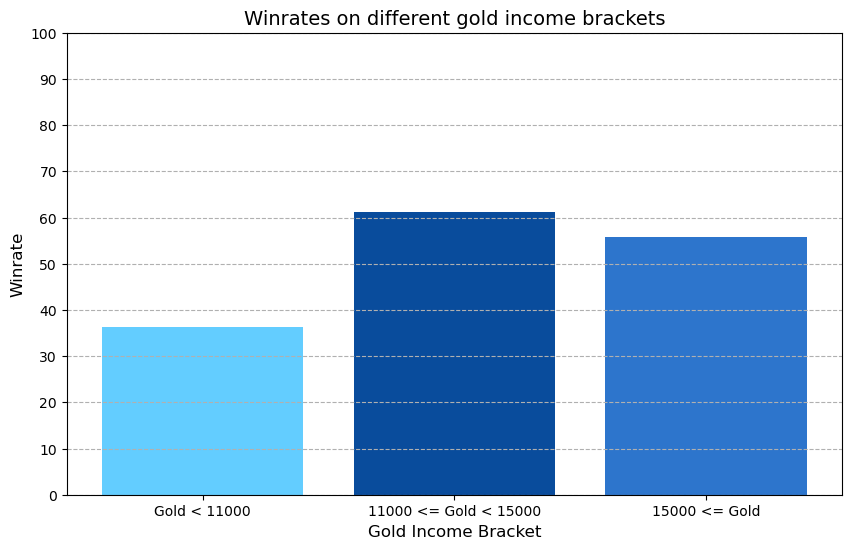

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(gold_brackets, gold_winrates, color=['#63cdff','#094c9c','#2d75cc'])
plt.title('Winrates on different gold income brackets', fontsize=14)
plt.xlabel('Gold Income Bracket', fontsize=12)
plt.ylabel('Winrate', fontsize=12)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.grid(axis='y', linestyle='--')
plt.show()

# Vision Score and Winrate
* I retraced the same steps from the gold income part.
* I was expecting lowest and highest vision score brackets to have lowest and highest winrates respectively.
* The reasoning behind my expectations is that it is harder to set up vision in games where your team and/or yourself is behind.
* The data met my expectations.


In [36]:
df['visionscore'].mean() 
##I am going to categorize my vision score into three brackets low(visionscore < 18) mid(18 <= visionscore < 22) high(visionscore >= 22)
##Expecting the lower vision score bracket to have the lowest winrate and highest vision score bracket to have the highest winrate.
##The reasoning behind my prediction is that setting up vision in the games where your team and/or yourself is behind is harder.
##Writin this after the results: my predictions were correct. This doesn't imply that there is a causation between vision score and winrate since we can't control other variables with my limited data but we can say that vision score and winrate are correlated.


20.195571955719558

In [37]:
lowvisiongames = df[df["visionscore"] < 17]
midvisiongames = df[(df["visionscore"] < 23) & (df["visionscore"] >= 17)]
highvisiongames = df[df["visionscore"] >= 23]

lowvision_won_games= lowvisiongames[lowvisiongames["win"] == 1]
midvision_won_games= midvisiongames[midvisiongames["win"] == 1]
highvision_won_games= highvisiongames[highvisiongames["win"] == 1]

print("Winrate of low vision score games: ", (len(lowvision_won_games)/len(lowvisiongames) * 100))
print("Winrate of mid vision score games: ", (len(midvision_won_games)/len(midvisiongames) * 100))
print("Winrate of high vision score games: ", (len(highvision_won_games)/len(highvisiongames) * 100))
print(' ')
print('Sample size of low vision score games: ' + str(len(lowvisiongames)))
print('Sample size of mid vision score games: ' + str(len(midvisiongames)))
print('Sample size of high vision score games: ' + str(len(highvisiongames)))

Winrate of low vision score games:  46.728971962616825
Winrate of mid vision score games:  53.84615384615385
Winrate of high vision score games:  59.30232558139535
 
Sample size of low vision score games: 107
Sample size of mid vision score games: 78
Sample size of high vision score games: 86


In [38]:
visionscore_brackets = ['Vision Score < 17', '17 <= Vision Score < 23', '23 <= Vision Score']
visionscore_winrates = [(len(lowvision_won_games)/len(lowvisiongames) * 100),(len(midvision_won_games)/len(midvisiongames) * 100),(len(highvision_won_games)/len(highvisiongames) * 100)]

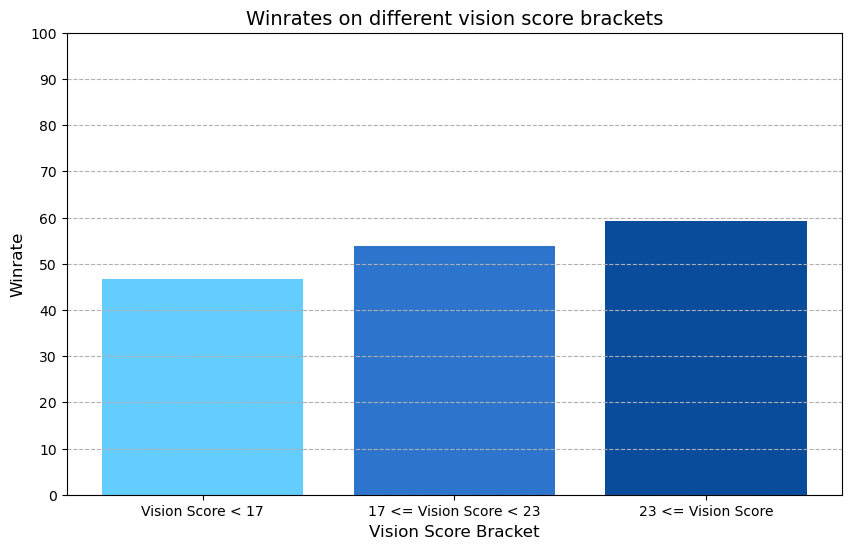

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(visionscore_brackets, visionscore_winrates, color=['#63cdff','#2d75cc','#094c9c'])
plt.title('Winrates on different vision score brackets', fontsize=14)#094c9c
plt.xlabel('Vision Score Bracket', fontsize=12)
plt.ylabel('Winrate', fontsize=12)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.grid(axis='y', linestyle='--')
plt.show()

# Game Lenght and Winrate
* Again I retraced the same steps from parts.
* I was expecting lowest and highest game lenght brackets to have lowest and highest winrates respectively.
* The reasoning behind my expectations is that i usually play scaling champions like Vladimir if the matchup is not terrible.
* My expectations were fully incorrect. Data shows that i actually lose more games as game goes into late stages.
* This results might be due to my Ahri games(69.9 WR) since they have much higher winrates than my Vladimir games(58 WR) and their game counts are similar.
* I was actually planning to test the hypothesis that my winrate increases as game lenght increases but now i am planning to do the opposite.
  

In [41]:
df['gamelenght'].mean() ##game lenght is in seconds.
##I am going to categorize my game lenghts into three brackets low(gamelenght < 1544) mid(1544 <= visionscore < 1944) high(visionscore >= 1944)
##Expecting the low game lenght bracket to have the lowest winrate and high game lenght bracket to have the highest winrate.
##The reasoning behind my prediction is that i am usually playing scaling champions(gets stronger compared to others as game progresses into the late stages.).
##Writin this after the results: my prediction was completely incorrect. My disappointment is immeasurable, and my day is ruined.

1744.8154981549815

In [42]:
lowgamelenghtgames = df[df["gamelenght"] < 1544] ##1544 = 25.73 minutes
midgamelenghtgames = df[(df["gamelenght"] < 1944) & (df["gamelenght"] >= 1544)]
highgamelenghtgames = df[df["gamelenght"] >= 1944] ##1944 = 32.40 minutes

lowgamelenght_won_games= lowgamelenghtgames[lowgamelenghtgames["win"] == 1]
midgamelenght_won_games= midgamelenghtgames[midgamelenghtgames["win"] == 1]
highgamelenght_won_games= highgamelenghtgames[highgamelenghtgames["win"] == 1]

print("Winrate of low game lenght games: ", (len(lowgamelenght_won_games)/len(lowgamelenghtgames) * 100))
print("Winrate of mid game lenght games: ", (len(midgamelenght_won_games)/len(midgamelenghtgames) * 100))
print("Winrate of high game lenght games: ", (len(highgamelenght_won_games)/len(highgamelenghtgames) * 100))
print(' ')
print('Sample size of low game lenght games: ' + str(len(lowgamelenghtgames)))
print('Sample size of mid game lenght games: ' + str(len(midgamelenghtgames)))
print('Sample size of high game lenght games: ' + str(len(highgamelenghtgames)))

Winrate of low game lenght games:  56.79012345679012
Winrate of mid game lenght games:  51.78571428571429
Winrate of high game lenght games:  50.0
 
Sample size of low game lenght games: 81
Sample size of mid game lenght games: 112
Sample size of high game lenght games: 78


In [43]:
gamelenght_brackets = ['Game Lenght < 25.73', '25.73 <= Game Lenght < 32.40', '32.40 <= Game Lenght']
gamelenght_winrates = [(len(lowgamelenght_won_games)/len(lowgamelenghtgames) * 100),(len(midgamelenght_won_games)/len(midgamelenghtgames) * 100),(len(highgamelenght_won_games)/len(highgamelenghtgames) * 100)]

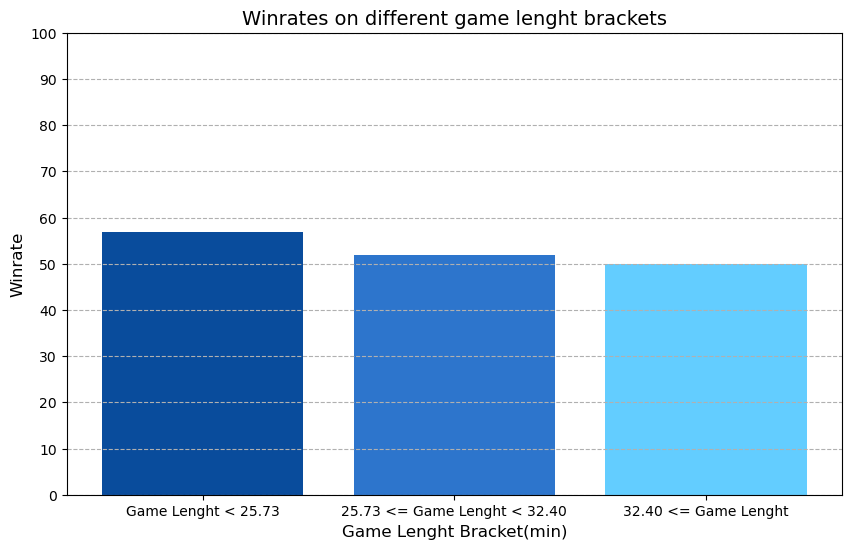

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(gamelenght_brackets, gamelenght_winrates, color=['#094c9c','#2d75cc','#63cdff'])
plt.title('Winrates on different game lenght brackets', fontsize=14)#094c9c
plt.xlabel('Game Lenght Bracket(min)', fontsize=12)
plt.ylabel('Winrate', fontsize=12)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.grid(axis='y', linestyle='--')
plt.show()

# Kills and Winrate
* Consturcted a scatter plot to show the correlation between kills and winrate.
* Trendline shows that my winrate increases as i get more kills.
  

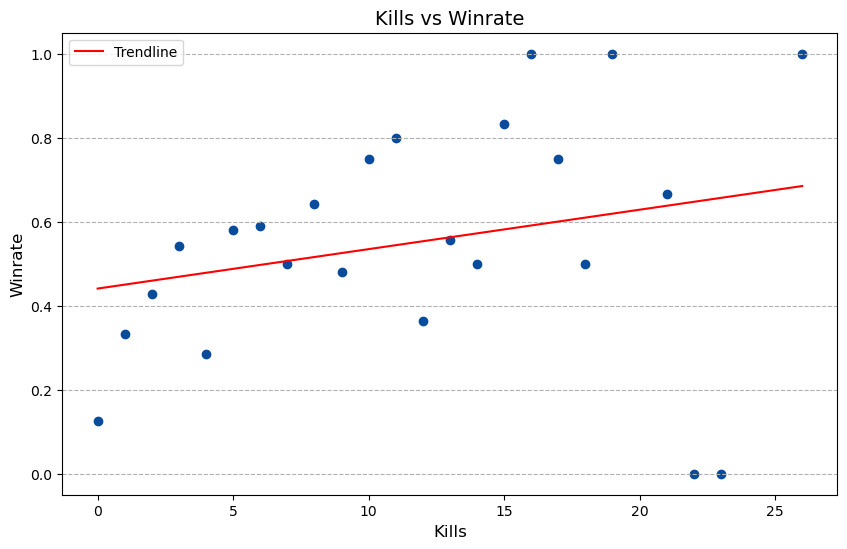

In [46]:
kills_and_winrates = df.groupby('kills')['win'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(kills_and_winrates.index, kills_and_winrates.values, color='#094c9c')
plt.title('Kills vs Winrate', fontsize=14)
plt.xlabel('Kills', fontsize=12)
plt.ylabel('Winrate', fontsize=12)
plt.grid(axis='y', linestyle='--')

kills_and_winrates_index = kills_and_winrates.index.astype(float)
kills_and_winrates_values = kills_and_winrates.values.astype(float)

coefficients = np.polyfit(kills_and_winrates_index, kills_and_winrates_values, 1)
trendline = np.poly1d(coefficients)

plt.plot(kills_and_winrates_index, trendline(kills_and_winrates_index), color='red', label='Trendline')
plt.legend()

plt.show()

# Deaths and Winrate
* Consturcted a scatter plot to show the correlation between deaths and winrate.
* Trendline shows that my winrate decreases as i die more and more.
  

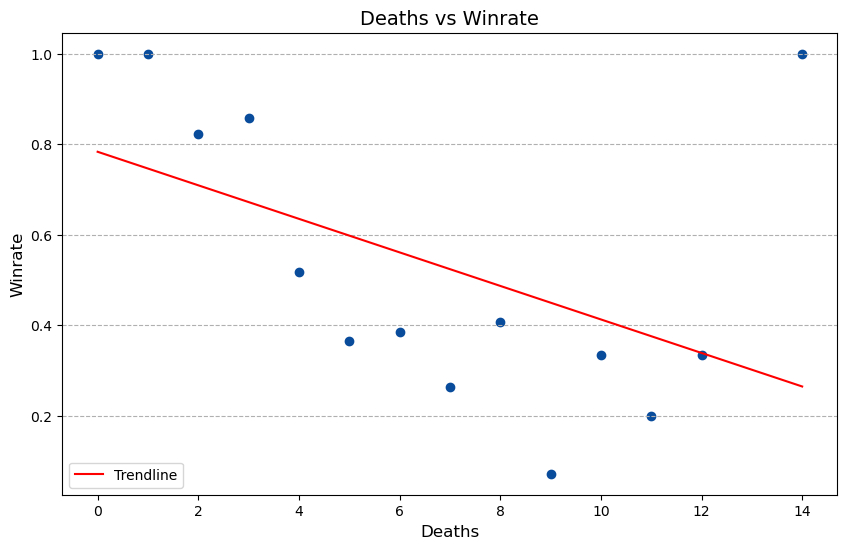

In [48]:
deaths_and_winrates = df.groupby('deaths')['win'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(deaths_and_winrates.index, deaths_and_winrates.values, color='#094c9c')
plt.title('Deaths vs Winrate', fontsize=14)
plt.xlabel('Deaths', fontsize=12)
plt.ylabel('Winrate', fontsize=12)
plt.grid(axis='y', linestyle='--')

deaths_and_winrates_index = deaths_and_winrates.index.astype(float)
deaths_and_winrates_values = deaths_and_winrates.values.astype(float)

coefficients = np.polyfit(deaths_and_winrates_index, deaths_and_winrates_values, 1)
trendline = np.poly1d(coefficients)

plt.plot(deaths_and_winrates_index, trendline(deaths_and_winrates_index), color='red', label='Trendline')
plt.legend()

plt.show()

# Heatmap of Numerical Categories
* Consturcted a heatmap using pearson method to explore other correlations.
* Method can be changed to spearman to check for nonlinear relationships.
  

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Collums')

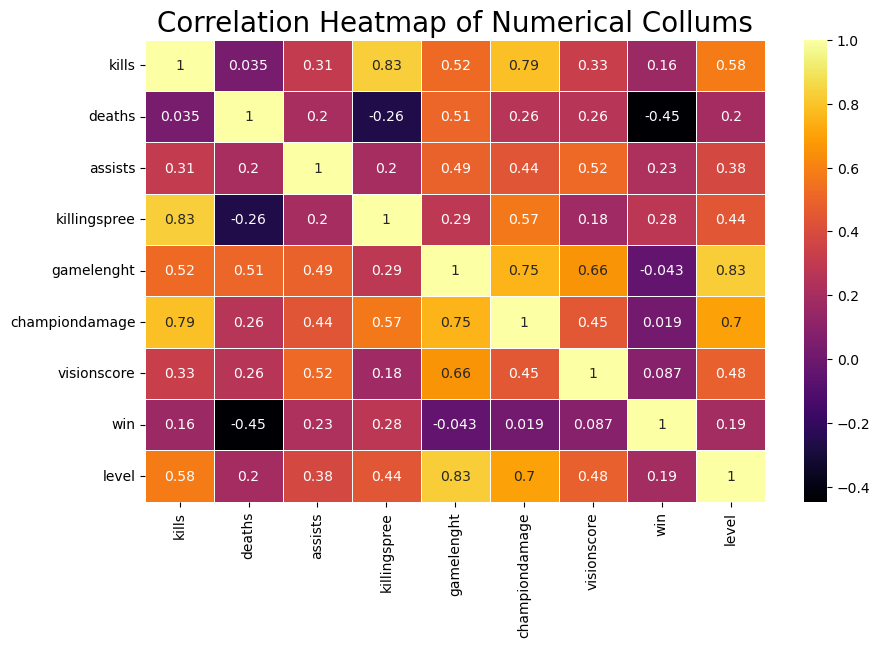

In [50]:
df_numerical = pd.DataFrame()

df_numerical['kills'] = df['kills'].astype(float)
df_numerical['deaths'] = df['deaths'].astype(float)
df_numerical['assists'] = df['assists'].astype(float)
df_numerical['killingspree'] = df['killingspree'].astype(float)
df_numerical['gamelenght'] = df['gamelenght'].astype(float)
df_numerical['championdamage'] = df['championdamage'].astype(float)
df_numerical['visionscore'] = df['visionscore'].astype(float)
df_numerical['win'] = df['win'].astype(float)
df_numerical['level'] = df['level'].astype(float)

correlation_matrix = df_numerical.corr(method='pearson')
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Collums', fontsize=20)


# Hypothesis Testing
* Used two sampled Z-test to check the hypothesis that my winrate is higher in lower game lenght games.
* Null Hypothesis: There is no difference in terms of winrate between game lenght brackets.
* Alternative Hypothesis: Winrate is in lower game lenght bracket is higher.
* Significance level: 0.05


In [52]:
print('H0: Game lenght does not have significant effect on the outcome of the game.')
print('H1: Winrate in lower game lenght bracket games(gamelenght < 25.73 minutes) is higher.')

lowgamelenghtgames = df[df["gamelenght"] < 1544]
lowgamelenght_won_games_sum = lowgamelenghtgames["win"].sum()

notlowgamelenghtgames = df[df["gamelenght"] >= 1544]
notlowgamelenght_won_games_sum = notlowgamelenghtgames["win"].sum()

z_score, pval = proportions_ztest([lowgamelenght_won_games_sum, notlowgamelenght_won_games_sum],[len(lowgamelenghtgames), len(notlowgamelenghtgames)],alternative="larger")
print('')
print('p_value: '+ str(pval))

if pval < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")



H0: Game lenght does not have significant effect on the outcome of the game.
H1: Winrate in lower game lenght bracket games(gamelenght < 25.73 minutes) is higher.

p_value: 0.193225865801386
Fail to reject the null hypothesis.


# Machine Learning
* Created a new data frame for machine learning and included only gold and win columns.
* Shuffled the new data frame.
* Used 80/20 ratio to train and test.
* Accuracy and Precision are not quite high. Needs more data to predict the results better.


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1}
Accuracy: 0.6545454545454545
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        28
           1       0.68      0.56      0.61        27

    accuracy                           0.65        55
   macro avg       0.66      0.65      0.65        55
weighted avg       0.66      0.65      0.65        55

Precision: 0.6818181818181818
AUC-ROC: 0.6527777777777778


win
0    28
1    27
Name: count, dtype: int64

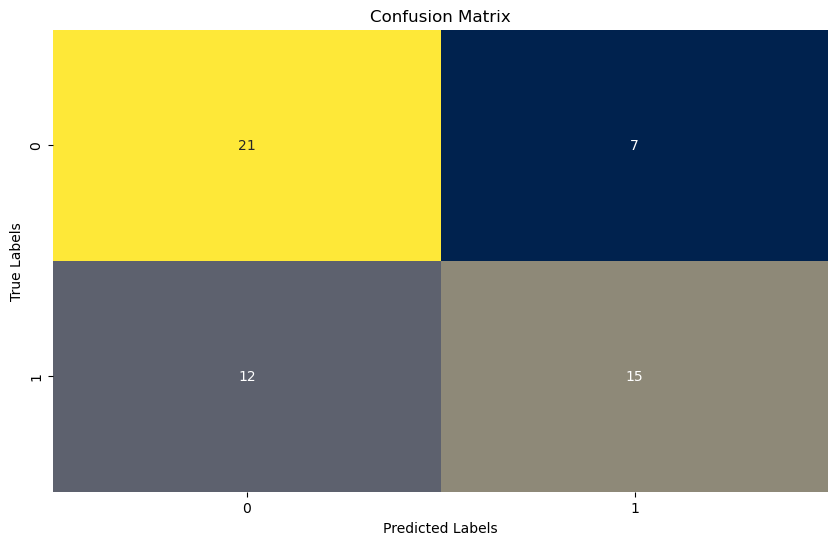

In [54]:
ml_df = df[['gold','win']].reset_index(drop=True)

shuffled_df = ml_df.sample(frac=1).reset_index(drop=True)
y = shuffled_df["win"].astype(int)
x = shuffled_df[['gold']]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(train_x, train_y)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_model = grid_search.best_estimator_

y_pred = best_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
classification_report_result = classification_report(test_y, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report_result)

precision = precision_score(test_y, y_pred)
roc_auc = roc_auc_score(test_y, y_pred)

print(f'Precision: {precision}')
print(f'AUC-ROC: {roc_auc}')
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
test_y.value_counts()


